In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### load file

In [85]:
data_df = pd.read_csv("./height_weight.csv")
data_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [86]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [88]:
data_df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [89]:
data_df["Height"] = round(data_df["Height"], 2)
data_df["Weight"] = round(data_df["Weight"], 2)
data_df.head()

,Gender,Height,Weight
0,Male,73.85,241.89
1,Male,68.78,162.31
2,Male,74.11,212.74
3,Male,71.73,220.04
4,Male,69.88,206.35


In [90]:
data_df = data_df.drop_duplicates(["Height", "Weight"])
data_df = data_df.reset_index(drop=True)
data_df

,Gender,Height,Weight
0,Male,73.85,241.89
1,Male,68.78,162.31
2,Male,74.11,212.74
3,Male,71.73,220.04
4,Male,69.88,206.35
...,...,...,...
9987,Female,66.17,136.78
9988,Female,67.07,170.87
9989,Female,63.87,128.48
9990,Female,69.03,163.85


In [91]:
data_df = data_df.sort_values(by="Height", axis=0)
data_df.head()

,Gender,Height,Weight
9278,Female,54.26,64.70
6619,Female,54.62,71.39
7289,Female,54.87,78.61
7612,Female,55.15,88.81
5341,Female,55.34,88.37


In [92]:
data_df.drop("Gender", axis=1, inplace=True)
data_df.head()

,Height,Weight
9278,54.26,64.70
6619,54.62,71.39
7289,54.87,78.61
7612,55.15,88.81
5341,55.34,88.37


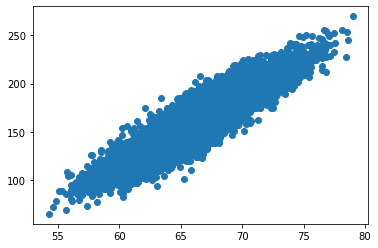

In [93]:
plt.scatter(data_df["Height"], data_df["Weight"])

In [94]:
x_average = sum(data_df["Height"]) / data_df.shape[0]
y_average = sum(data_df["Weight"]) / data_df.shape[0]
print(x_average, y_average)

66.36813350680505 161.44396817453963


#### 표준편차 구하기

In [95]:
height_dispersion = 0
for i in data_df["Height"]:
    height_dispersion += (i - x_average)** 2
height_dispersion = np.sqrt(height_dispersion / data_df.shape[0])
print(height_dispersion)

3.847601509888086


In [96]:
weight_dispersion = 0
for i in data_df["Weight"]:
    weight_dispersion += (i - y_average) ** 2
weight_dispersion = np.sqrt(weight_dispersion / data_df.shape[0])
print(weight_dispersion)

32.10997973613678


#### 상관계수 구하기

In [97]:
r = 0
heights = np.array(data_df["Height"].tolist())
weights = np.array(data_df["Weight"].tolist())
for height, weight in zip(heights, weights):
    r += ((height - x_average) / height_dispersion) * ((weight - y_average) / weight_dispersion)
r /= data_df.shape[0] - 1
print(r)

0.9248202886221012


#### 기울기 구하기

In [98]:
b1 = r * weight_dispersion / height_dispersion
print(b1)

7.718044774363236


#### 절편 구하기

In [99]:
b0 = abs(b1 * x_average - y_average)
print(b0)

350.78825782189864


#### 예측

In [100]:
### y = b1x + b0
y_pred = np.array([])
for i in weights:
    y_pred = np.append(y_pred, [b1 * i + b0])
y_pred *= 0.1
print(y_pred)

[ 85.01457547  90.17794743  95.75037575 ... 231.03226456 224.73434002
 243.45831665]


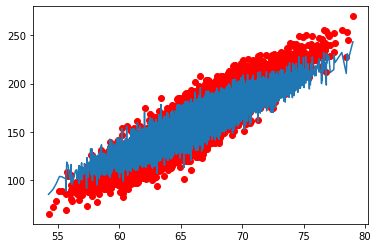

In [101]:
plt.scatter(heights, weights, color="red")
plt.plot(heights, y_pred)

In [151]:
class CustomLinearRegression():
    def __init__(self):
        self.a = 0
        self.b = 0
        self.x_average = 0
        self.y_average = 0
        self.x_dispersion = 0
        self.y_dispersion = 0
        self.r = 0
        
    def fit(self, X=None, y=None, d_len=None):
        if X is None or y is None:
            raise Exception("x and y cannot be None.")
        if d_len is None:
            raise Exception("shape cannot be None.")
        self.fit_logic(X, y, d_len)
            
    # 학습
    def fit_logic(self, X, y, d_len):
        ## 평균 구하기
        self.x_average = sum(X) / d_len
        self.y_average = sum(y) / d_len
        
        ## 표준편차 구하기
        for i in X:
            self.x_dispersion += (i - self.x_average)** 2
        self.x_dispersion = np.sqrt(self.x_dispersion / d_len)
        
        for i in y:
            self.y_dispersion += (i - self.y_average)** 2
        self.y_dispersion = np.sqrt(self.y_dispersion / d_len)
    
        ## 상관계수 구하기
        r = 0
        for x_d, y_d in zip(X, y):
            r += ((x_d - self.x_average) / self.x_dispersion) * ((y_d - self.y_average) / self.y_dispersion)
        r = r / d_len - 1
        
        ## 기울기
        self.a = r * self.y_dispersion / self.x_dispersion
        
        ## 절편
        self.b = abs(self.a * self.x_average - self.y_average)
    
    # 예측
    def predict(self, x):
        pred = np.array([])
        
        for i in x:
            pred = np.append(pred, [b1 * i + b0])
        pred *= 0.1
        return pred
    
    # 평가
    def evaluation(self, y, pred):
        accuracy_list = []
        for r, p in zip(y, pred):
            accuracy_list.append(1 - abs(r - p))
        accuracy = abs(sum(accuracy_list) / len(accuracy_list))
        return accuracy
    
    def evaluation_graph(self, X, y, pred, sca_col="red", pre_col="blue"):
        try:
            plt.scatter(heights, weights, color=sca_col)
            plt.plot(heights, y_pred, color=pre_col)
        except:
            raise Exception("import matplotlib.pyplot as plt")

In [152]:
linearRegression = CustomLinearRegression()
linearRegression.fit(heights, weights, 10000)

In [153]:
pred = linearRegression.predict(heights)
print(pred)

[76.95693673 77.23478634 77.42773746 ... 95.6886314  95.7580938
 96.0513795 ]


In [154]:
accuracy = linearRegression.evaluation(weights, pred)
print(accuracy)

74.14928075434823


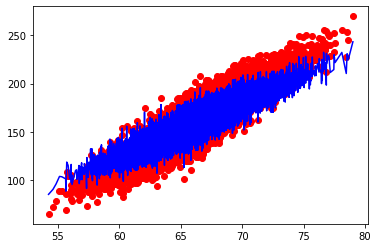

In [155]:
accuracy = linearRegression.evaluation_graph(heights, weights, pred)